#  GENOM PROJECT 2020-2021

## Kmer computation in phylogeny reconstruction
#### Alex Lence, Simon Chardin, Adrien Leroy

This project tries to implement various phylogeny reconstruction methodologies from K-Mer signatures using **kython**, a python package we devised for the occasion [Kython on Github](https://www.github.com/LeroyAdrien/Kython), [Kython on testPypi](https://test.pypi.org/project/kython/)

<img src='TOL_notebook.png' title="Tree from Archaeas and Bacterias">&nbsp;

##### This notebook shows:

* **Module pp**
    * **Downloading** Whole Genomes from **ncbi website** with Archea names list, Bacteria names list
    * Computing **K-mer signature** from an .fna file 
    * Computing **distance matrices** of all the files in a folder
    * Computing Phylogenetic tree from said distance matrix in **Newick Format** using **NJ algorithm**
    * Computing **Chi2 conformity** between subsamples of a genome to spot **horizontal transfers**
    
    
    
* **Module pl**
    * Plotting **K-mer signature** with custom matplotlib barplot
    * Plotting **Phylogenetic tree** in newick format using itools
    * Plotting **horizontal transfers** on genome with custom matplotlib

In [1]:
from kython import pp,pl
import matplotlib.pyplot as plt
import numpy as np
import random

### I-Downloading whole genomes from the ncbi website and retrieving the folder structure

We used a nested dictionnary to be able to retrieve phylums, organism names and genomin .fna file path



**Structure is the following:** $\color{black}{\text{Dictionnary}}$**\[**$\color{blue}{\text{Phylum}}$**\]\[**$\color{blue}{\text{Organism}}$**\]=**$\color{red}{\text{'Path to Genomic File'}}$

#### Setting up paths 

In [2]:
bacteriaListPath='../data/Bacteria.list'
archaeaListPath='../data/Archea.list'
resultsfolder='../data/refseq/'
outputPath='../data/'

#### Downloading files

In [15]:
pathDictionnary=pp.DownloadSequences(bacteriaListPath,archaeaListPath,outputPath)


Downloading: Bactéries


No downloads matched your filter. Please check your options.


Downloading: Acholeplasma laidlawii PG-8A
Downloading: Acidobacterium capsulatum ATCC 51196
Downloading: Akkermansia muciniphila ATCC BAA-835
Downloading: Alicyclobacillus acidocaldarius subsp. acidocaldarius DSM 446
Downloading: Aquifex aeolicus VF5
Downloading: Bacillus cereus Q1
Downloading: Bacillus pseudofirmus OF4
Downloading: Bacteroides fragilis YCH46
Downloading: Bdellovibrio bacteriovorus HD100
Downloading: Bordetella pertussis Tohama I
Downloading: Borrelia burgdorferi B31


No downloads matched your filter. Please check your options.


Downloading: Campylobacter jejuni subsp. jejuni 81-176
Downloading: Candidatus Amoebophilus asiaticus 5a2
Downloading: Candidatus Cloacamonas acidaminovorans


No downloads matched your filter. Please check your options.


Downloading: Candidatus Endomicrobium sp. Rs-D17


No downloads matched your filter. Please check your options.


Downloading: Carboxydothermus hydrogenoformans Z-2901
Downloading: Chlamydia trachomatis 434/Bu
Downloading: Chlorobium chlorochromatii CaD3
Downloading: Chloroflexus aurantiacus J-10-fl
Downloading: Clostridium acetobutylicum ATCC 824
Downloading: Corynebacterium glutamicum ATCC 13032
Downloading: Coxiella burnetii RSA 493
Downloading: Cupriavidus taiwanensis
Downloading: Cupriavidus taiwanensis
Downloading: Cyanothece sp. ATCC 51142


No downloads matched your filter. Please check your options.


Downloading: Cyanothece sp. ATCC 51142


No downloads matched your filter. Please check your options.


Downloading: Dehalococcoides ethenogenes 195


No downloads matched your filter. Please check your options.


Downloading: Deinococcus radiodurans R1
Downloading: Deinococcus radiodurans R1
Downloading: Dictyoglomus thermophilum H-6-12
Downloading: Elusimicrobium minutum Pei191
Downloading: Fibrobacter succinogenes subsp. succinogenes S85
Downloading: Flavobacterium psychrophilum JIP02/86
Downloading: Fusobacterium nucleatum subsp. nucleatum ATCC 25586


No downloads matched your filter. Please check your options.


Downloading: Gemmata obscuriglobus UQM 2246
Downloading: Gemmatimonas aurantiaca T-27
Downloading: Gloeobacter violaceus PCC 7421
Downloading: Leptospira interrogans serovar Lai str. 56601
Downloading: Leptospira interrogans serovar Lai str. 56601
Downloading: Magnetococcus sp. MC-1


No downloads matched your filter. Please check your options.


Downloading: Methylacidiphilum infernorum V4
Downloading: Mycoplasma genitalium G37
Downloading: Nostoc punctiforme PCC 73102
Downloading: Opitutus terrae PB90-1
Downloading: Pedobacter heparinus DSM 2366
Downloading: Pirellula staleyi DSM 6068
Downloading: Prochlorococcus marinus str. AS9601
Downloading: Psychrobacter arcticus 273-4
Downloading: Rhizobium leguminosarum bv. trifolii WSM1325
Downloading: Rhodopirellula baltica SH 1
Downloading: Rhodospirillum rubrum ATCC 11170
Downloading: Rickettsia rickettsii str. Iowa
Downloading: Shewanella putrefaciens CN-32
Downloading: Solibacter usitatus Ellin6076


No downloads matched your filter. Please check your options.


Downloading: Synechococcus elongatus PCC 6301
Downloading: Thermanaerovibrio acidaminovorans DSM 6589
Downloading: Thermoanaerobacter tengcongensis MB4


No downloads matched your filter. Please check your options.


Downloading: Thermobaculum terrenum ATCC BAA-798
Downloading: Thermobaculum terrenum ATCC BAA-798
Downloading: Thermodesulfovibrio yellowstonii DSM 11347
Downloading: Thermomicrobium roseum DSM 5159
Downloading: Thermotoga maritima MSB8
Downloading: Thermus thermophilus HB8
Downloading: Archées


No downloads matched your filter. Please check your options.


Downloading: Aeropyrum pernix K1
Downloading: Archaeoglobus fulgidus DSM 4304
Downloading: Archaeoglobus profundus DSM 5631
Downloading: Caldivirga maquilingensis IC-167
Downloading: Candidatus Korarchaeum cryptofilum OPF8
Downloading: Candidatus Methanoregula boonei 6A8


No downloads matched your filter. Please check your options.


Downloading: Candidatus Methanosphaerula palustris E1-9c


No downloads matched your filter. Please check your options.


Downloading: Cenarchaeum symbiosum A


No downloads matched your filter. Please check your options.


Downloading: Desulfurococcus kamchatkensis 1221n


No downloads matched your filter. Please check your options.


Downloading: Haloarcula marismortui ATCC 43049
Downloading: Haloarcula marismortui ATCC 43049
Downloading: Halobacterium sp. NRC-1


No downloads matched your filter. Please check your options.


Downloading: Halomicrobium mukohataei DSM 12286
Downloading: Haloquadratum walsbyi DSM 16790
Downloading: Halorhabdus utahensis DSM 12940
Downloading: Halorubrum lacusprofundi ATCC 49239
Downloading: Halorubrum lacusprofundi ATCC 49239
Downloading: Haloterrigena turkmenica DSM 5511
Downloading: Hyperthermus butylicus DSM 5456
Downloading: Ignicoccus hospitalis KIN4/I
Downloading: Metallosphaera sedula DSM 5348
Downloading: Methanobrevibacter ruminantium M1
Downloading: Methanocaldococcus fervens AG86
Downloading: Methanocella paludicola SANAE
Downloading: Methanococcoides burtonii DSM 6242
Downloading: Methanococcus aeolicus Nankai-3
Downloading: Methanococcus maripaludis C6
Downloading: Methanococcus vannielii SB
Downloading: Methanocorpusculum labreanum Z
Downloading: Methanoculleus marisnigri JR1
Downloading: Methanopyrus kandleri AV19
Downloading: Methanosaeta thermophila PT


No downloads matched your filter. Please check your options.


Downloading: Methanosarcina acetivorans C2A
Downloading: Methanosarcina barkeri str. Fusaro
Downloading: Methanosarcina mazei Go1
Downloading: Methanosphaera stadtmanae DSM 3091
Downloading: Methanospirillum hungatei JF-1
Downloading: Nanoarchaeum equitans Kin4-M


No downloads matched your filter. Please check your options.


Downloading: Natronomonas pharaonis DSM 2160
Downloading: Nitrosopumilus maritimus SCM1
Downloading: Picrophilus torridus DSM 9790
Downloading: Pyrobaculum aerophilum str. IM2
Downloading: Pyrobaculum arsenaticum DSM 13514
Downloading: Pyrococcus abyssi GE5
Downloading: Pyrococcus furiosus DSM 3638
Downloading: Pyrococcus horikoshii OT3
Downloading: Staphylothermus marinus F1
Downloading: Sulfolobus acidocaldarius DSM 639
Downloading: Sulfolobus solfataricus P2


No downloads matched your filter. Please check your options.


Downloading: Thermococcus gammatolerans EJ3
Downloading: Thermofilum pendens Hrk 5
Downloading: Thermoplasma acidophilum DSM 1728
Downloading: Thermoplasma volcanium GSS1
Downloading: Thermoproteus neutrophilus V24Sta


No downloads matched your filter. Please check your options.


Following Bacterias Genomes were not downloaded: 

Acholeplasma laidlawii PG-8A
Acidobacterium capsulatum ATCC 51196
Akkermansia muciniphila ATCC BAA-835
Alicyclobacillus acidocaldarius subsp. acidocaldarius DSM 446
Aquifex aeolicus VF5
Bacillus cereus Q1
Bacillus pseudofirmus OF4
Bacteroides fragilis YCH46
Bdellovibrio bacteriovorus HD100
Bordetella pertussis Tohama I
Borrelia burgdorferi B31
Campylobacter jejuni subsp. jejuni 81-176
Candidatus Amoebophilus asiaticus 5a2
Candidatus Cloacamonas acidaminovorans
Candidatus Endomicrobium sp. Rs-D17
Carboxydothermus hydrogenoformans Z-2901
Chlamydia trachomatis 434/Bu
Chlorobium chlorochromatii CaD3
Chloroflexus aurantiacus J-10-fl
Clostridium acetobutylicum ATCC 824
Corynebacterium glutamicum ATCC 13032
Coxiella burnetii RSA 493
Cupriavidus taiwanensis
Cupriavidus taiwanensis
Cyanothece sp. ATCC 51142
Cyanothece sp. ATCC 51142
Dehalococcoides ethenogenes 195
Deinococcus radiodurans R1
Deinococcus radiodurans R1
Dictyoglomus thermophilum H

### II-Retrieving organisms names linked to their .fna files

If you have already downloaded some files you can retrieve them directly by using ``` pp.ParseSequences(folder)```

In [3]:
pathDictionnary=pp.ParseSequences(resultsfolder)

#### We retreived the following organisms:

In [5]:
print("Bacterias:",'\n')
for bacteria in pathDictionnary['bacteria'].keys():
    print(bacteria)
print("\n")

print("Archaeas:",'\n')
for archaea in pathDictionnary['archaea'].keys():
    print(archaea)

Bacterias: 

Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_6119_chromosome_CBM2610_a
Methylacidiphilum_infernorum_V4
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_SWF_66322_
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_8558_chromosome_CBM2615_a
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_3679_
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_ip2.30/pp_2.30_chromosome_CBM2623_a
Coxiella_burnetii_RSA_493
Campylobacter_jejuni_subsp._jejuni_81-176-UMCW7_plasmid_pVir
Mycoplasma_genitalium_G37
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_3521_chromosome_CBM2589_a
Bacteroides_fragilis_YCH46
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_3511_chromosome_CBM2588_a
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_8561_chromosome_CBM2618_a
Thermotoga_maritima_MSB8
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_mpp_1.3_chromosome_CBM2625_a
Nostoc_punctiforme_PCC_73102
Bordetella_pertussis_

### IIIa-Computing a K-mer signature from a genomic file

To compute a Kmer signature, we need to specify the size of said Kmer and if we want to normalize counts. <br>
$\color{red}{\text{Warning}}$: If the size of the Kmer is to high, memory issues can appear. We advise you to use Kmer size between **2 and 8 bases**

In [5]:
signatureExample=pp.KmerSignature(pathTest,3,False)

In [6]:
display(signatureExample)

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,164445,62969,92871,103563,58168,46190,27208,53014,83932,57138,...,34351,83152,78296,62872,49624,58467,83779,104245,69314,161803


### IIIb-Plotting the signature

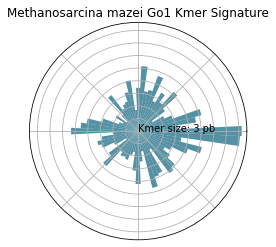

In [7]:
pl.KmerSignature(signatureExample,'Methanosarcina mazei Go1')

### IIIc-Conservation of the signature no matter the Kmer size

We can see here that the overall structure of the signature is globally conserved No matter the Kmer size, thanks to the polar aspect of the graph plotted here

$\color{red}{\text{Warning}}$: Due to the sheer number of possible Kmer combination for high Kmer size, plotting of signatures can get quite long when tu size of Kmer gets bigger (especially 7 and 8 pb long Kmers)


In [8]:
signatures=[pp.KmerSignature(pathTest,i,False) for i in range(1,9)]

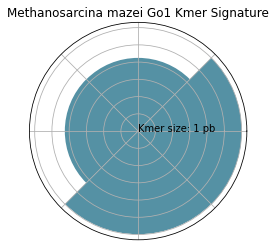

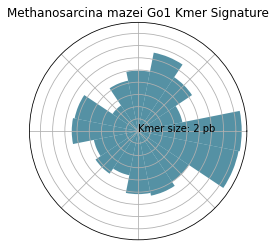

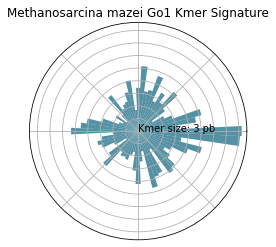

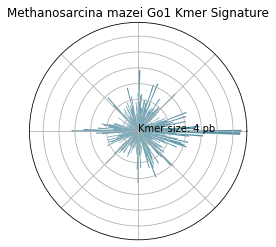

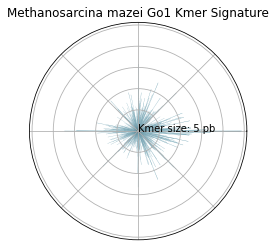

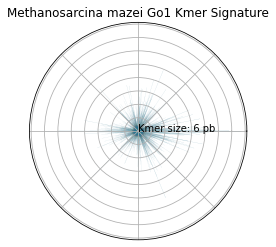

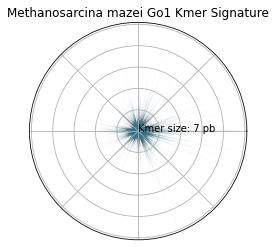

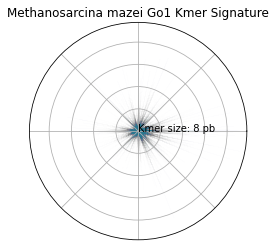

In [9]:
for signature in signatures:
    pl.KmerSignature(signature,'Methanosarcina mazei Go1')

### IV-Computing a genetic distance matrix for all organisms in a folder

In [16]:
distanceMatrix=pp.DistanceMatrix(pathDictionnary,3)

In [17]:
display(distanceMatrix)

,Methanobrevibacter_ruminantium_M1,Staphylothermus_marinus_F1,Methanosarcina_barkeri_str._Fusaro,Nitrosopumilus_maritimus_SCM1,Archaeoglobus_profundus_DSM_5631,Caldivirga_maquilingensis_IC-167,Methanocella_paludicola_SANAE,Haloarcula_marismortui_ATCC_43049_chromosome_I,Pyrococcus_furiosus_DSM_3638,Methanosarcina_mazei_Go1,...,Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_8557_chromosome_CBM2614_a,Psychrobacter_arcticus_273-4,Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_8558_chromosome_CBM2615_a,Bordetella_pertussis_Tohama_I_,Alicyclobacillus_acidocaldarius_subsp._acidocaldarius_DSM_446,Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_LMG_19425_,Nostoc_punctiforme_PCC_73102,Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_8564_chromosome_CBM2621_a,Carboxydothermus_hydrogenoformans_Z-2901,Gemmata_obscuriglobus_UQM_2246_
Methanobrevibacter_ruminantium_M1,0.000000,0.040198,0.036123,0.033875,0.057535,0.073932,0.104312,0.138466,0.049919,0.045833,...,0.159843,0.058876,0.159853,0.162066,0.136761,0.158216,0.047525,0.159663,0.051117,0.159248
Staphylothermus_marinus_F1,0.040198,0.000000,0.039305,0.052706,0.045592,0.055608,0.089696,0.123439,0.040988,0.046581,...,0.147977,0.050880,0.147985,0.150287,0.124048,0.146270,0.043850,0.147770,0.058537,0.145977
Methanosarcina_barkeri_str._Fusaro,0.036123,0.039305,0.000000,0.036871,0.029933,0.061508,0.076610,0.109875,0.026664,0.012079,...,0.134337,0.042672,0.134347,0.136756,0.109463,0.132558,0.026281,0.134085,0.035942,0.131858
Nitrosopumilus_maritimus_SCM1,0.033875,0.052706,0.036871,0.000000,0.053086,0.078946,0.103212,0.133101,0.049218,0.045574,...,0.155796,0.057655,0.155806,0.158215,0.131209,0.154070,0.041499,0.155590,0.058284,0.155072
Archaeoglobus_profundus_DSM_5631,0.057535,0.045592,0.029933,0.053086,0.000000,0.055529,0.066128,0.096895,0.019966,0.029591,...,0.126226,0.043830,0.126236,0.129145,0.097311,0.124257,0.030273,0.125895,0.050342,0.121329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_LMG_19425_,0.158216,0.146270,0.132558,0.154070,0.124257,0.126922,0.068470,0.058602,0.132637,0.125736,...,0.002565,0.111433,0.002602,0.010821,0.040399,0.000000,0.121371,0.002274,0.127239,0.037505
Nostoc_punctiforme_PCC_73102,0.047525,0.043850,0.026281,0.041499,0.030273,0.052475,0.070320,0.100853,0.032654,0.030271,...,0.123147,0.027021,0.123157,0.125821,0.099718,0.121371,0.000000,0.122942,0.040445,0.121936
Cupriavidus_taiwanensis_isolate_Cupriavidus_taiwanensis_STM_8564_chromosome_CBM2621_a,0.159663,0.147770,0.134085,0.155590,0.125895,0.128387,0.070057,0.060007,0.134211,0.127256,...,0.001045,0.112983,0.001021,0.010048,0.041914,0.002274,0.122942,0.000000,0.128593,0.038014
Carboxydothermus_hydrogenoformans_Z-2901,0.051117,0.058537,0.035942,0.058284,0.050342,0.067222,0.076339,0.109355,0.046505,0.036316,...,0.128798,0.052620,0.128808,0.130696,0.107528,0.127239,0.040445,0.128593,0.000000,0.123723


### V-Computing a tree from a distance matrix using Neighbour Joining

In [19]:
treeExample=pp.NeighbourJoining(distanceMatrix)
print(treeExample)

Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8565 chromosome CBM2622_a:0((((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8560 chromosome CBM2617_a:2.088319860673295e-05,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8564 chromosome CBM2621_a:2.7057566132185472e-05):1.0647796163921478e-05),((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8561 chromosome CBM2618_a:5.0441631504483445e-05,((((((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis ip2.30/pp 2.30 chromosome CBM2623_a:0.00010349340470172934,((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 3511 chromosome CBM2588_a:6.255494915231744e-05,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 6150 chromosome CBM2608_a:0.00013012958594734174):3.126199122754653e-05)):0.00018643629977159443),((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 3521 chromosome CBM2589_a:0.0002864949529086644,((((((Cupriavidus taiwanensis isolate Cupriavidus taiwane

### Va-Exploring all trees in regards to Kmer size

In [21]:
for kmerSize in range(2,3):
    print("Kmer size:",kmerSize)
    print("Computing Distance Matrix")
    distanceMatrix=pp.DistanceMatrix(pathDictionnary,kmerSize)
    print("Computing Tree")
    tree=pp.NeighbourJoining(distanceMatrix)
    print("Plotting Tree")
    pl.GraphTree(tree,pathDictionnary,'Tree_'+str(kmerSize)+'.png')

Kmer size: 2
Computing Distance Matrix
Computing Tree
Plotting Tree


### VI-Exploring the sequence Homogeneity

In this part we explore various parameters to study Kmer signature homogeneity along the sequence of an organism

**We study**

1. K-Mer size
2. Genomic Fragment size

**On Following organisms**

* **Archaeas**
    * Coxiella burnetii RSA 493
    * Gemmatimonas aurantiaca T-27
* **Bacterias**
    * Methanobrevibacter ruminantium M1
    * Aeropyrum pernix K1

#### VIa-K-Mer size:  

Bacteria Representant: Coxiella burnetii RSA 493


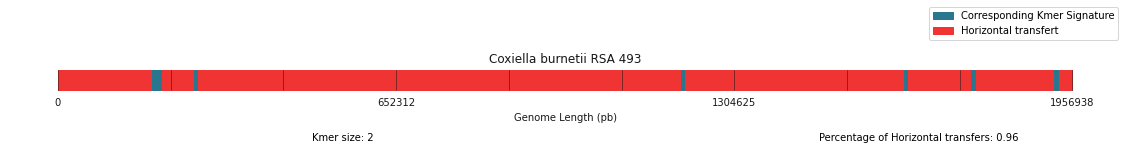

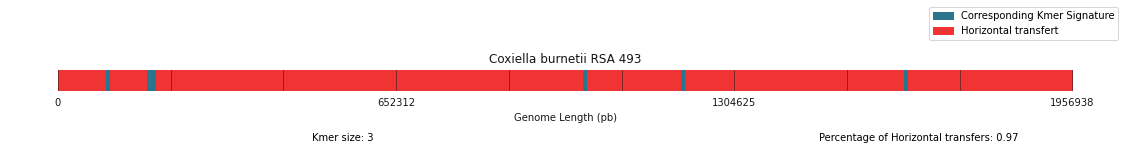

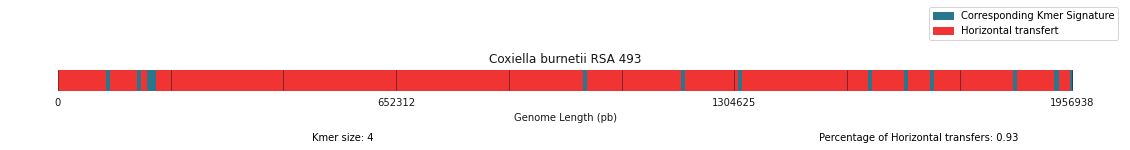

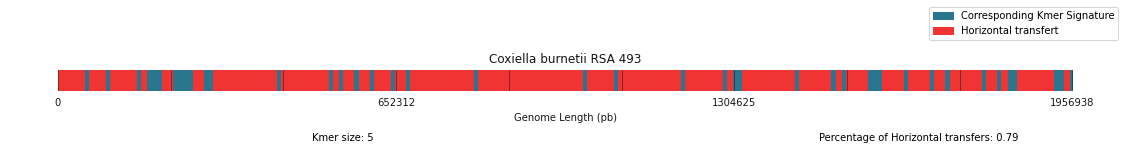

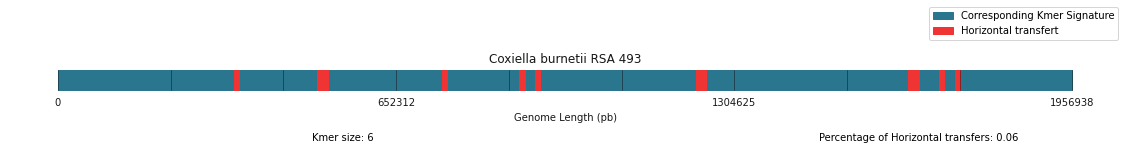

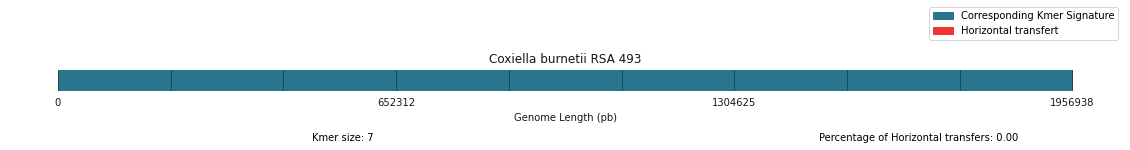

Archaea Representant:


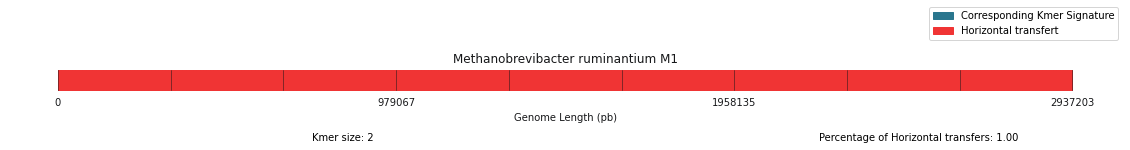

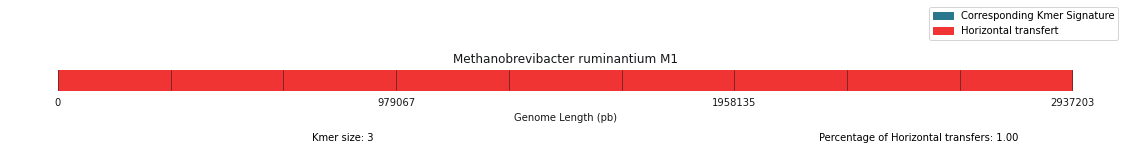

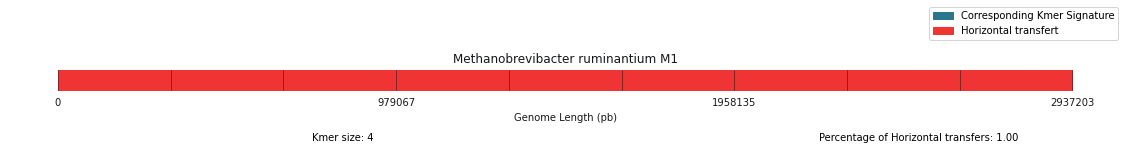

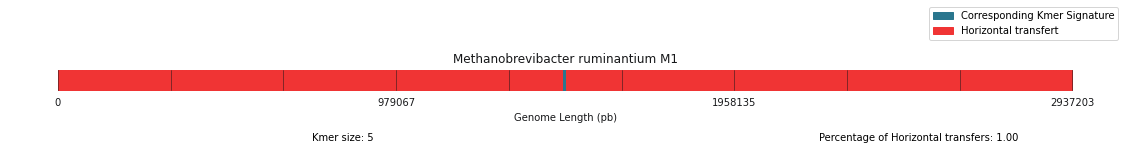

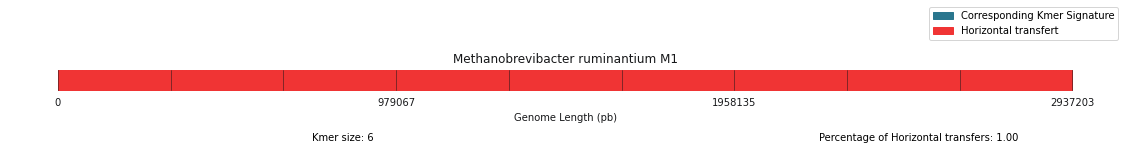

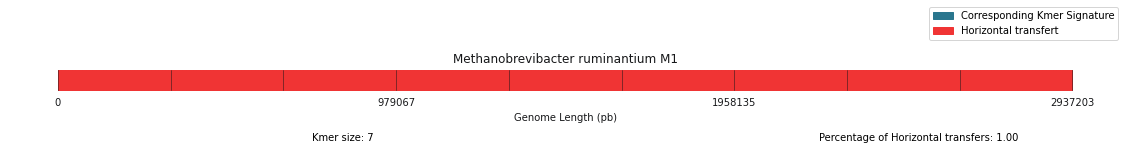

In [5]:
print("Bacteria Representant: Coxiella burnetii RSA 493")
bacteriaStudied="Coxiella burnetii RSA 493"


for kmerSize in range(2,8):
    listPvalue,listPositions=pp.SequenceHomogeneity(pathDictionnary["bacteria"][bacteriaStudied],kmerSize,10000)
    pl.SequenceHomogeneity(listPvalue,listPositions,0.05,"Coxiella burnetii RSA 493",kmerSize)
    
print("Archaea Representant: Methanobrevibacter ruminantium M1")
archaeaStudied="Methanobrevibacter ruminantium M1"
                              
for kmerSize in range(2,8):
    listPvalue,listPositions=pp.SequenceHomogeneity(pathDictionnary["archaea"][archaeaStudied],kmerSize,10000)
    pl.SequenceHomogeneity(listPvalue,listPositions,0.05,"Methanobrevibacter ruminantium M1",kmerSize)

#### VIb-Genomic Fragment size:  

Bacteria Representant:
Fragment Size: 10000


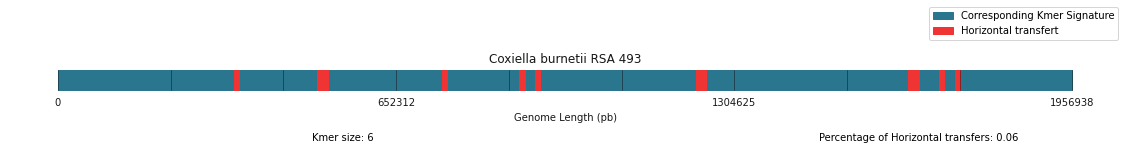

Fragment Size: 31622


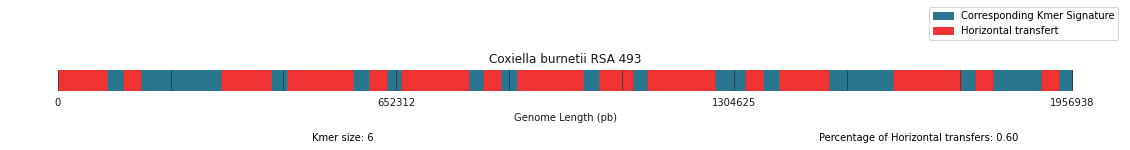

Fragment Size: 100000


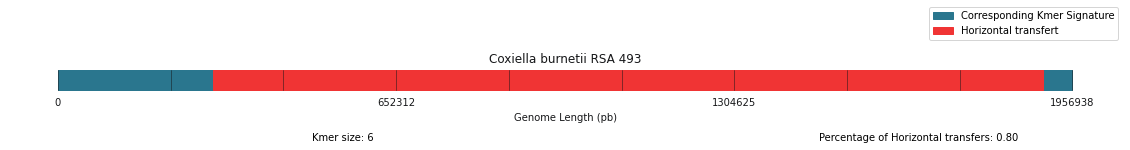

Fragment Size: 316227


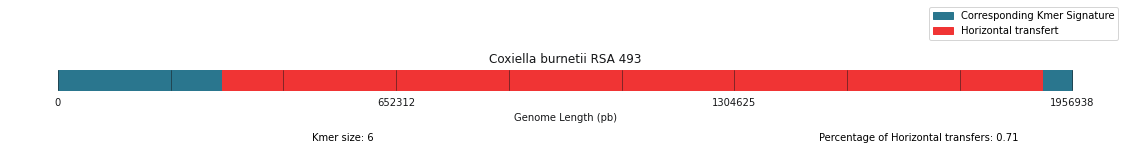

Fragment Size: 1000000


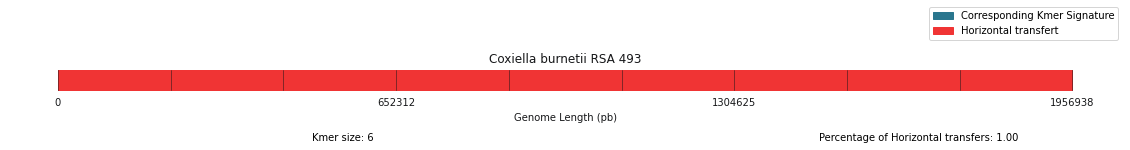

Archaea Representant:
Fragment Size: 10000


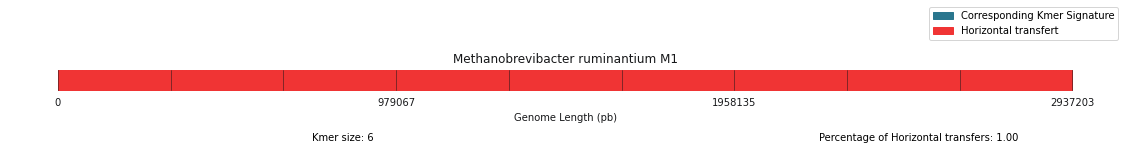

Fragment Size: 31622


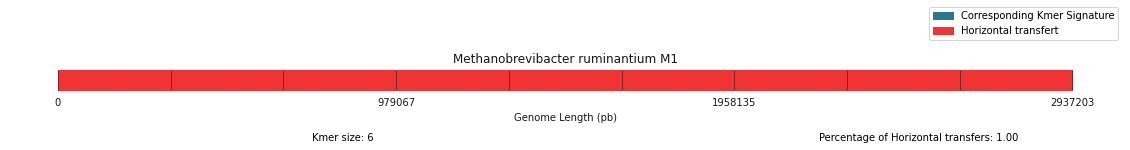

Fragment Size: 100000


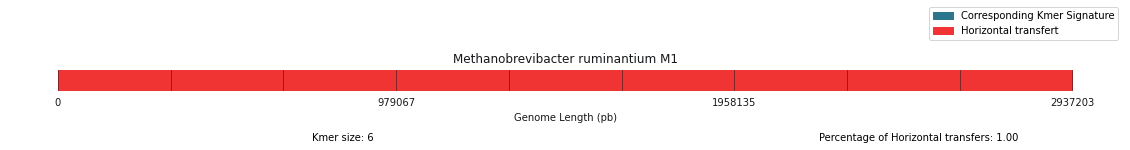

Fragment Size: 316227


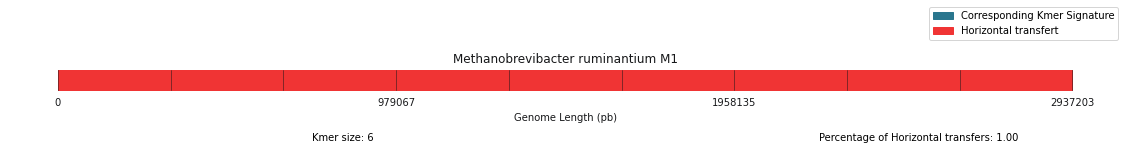

Fragment Size: 1000000


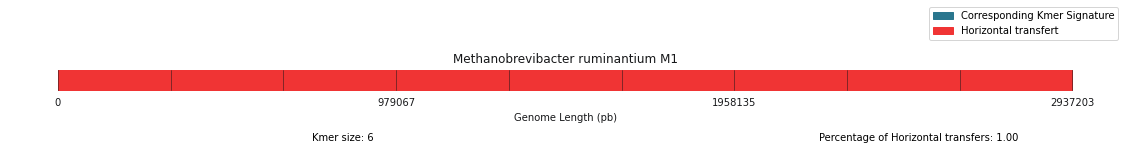

In [15]:
print("Bacteria Representant:")
for fragmentsize in np.logspace(4,6,5):
    print("Fragment Size:",int(fragmentsize))
    listPvalue,listPositions=pp.SequenceHomogeneity(pathDictionnary["bacteria"][bacteriaStudied],6,int(fragmentsize))
    pl.SequenceHomogeneity(listPvalue,listPositions,0.05,"Coxiella burnetii RSA 493",6)
    
print("Archaea Representant:")
for fragmentsize in np.logspace(4,6,5):
    print("Fragment Size:",int(fragmentsize))
    listPvalue,listPositions=pp.SequenceHomogeneity(pathDictionnary["archaea"][archaeaStudied],6,int(fragmentsize))
    pl.SequenceHomogeneity(listPvalue,listPositions,0.05,"Methanobrevibacter ruminantium M1",6)

#### VIc-Variance between organisms:  

Bacterias


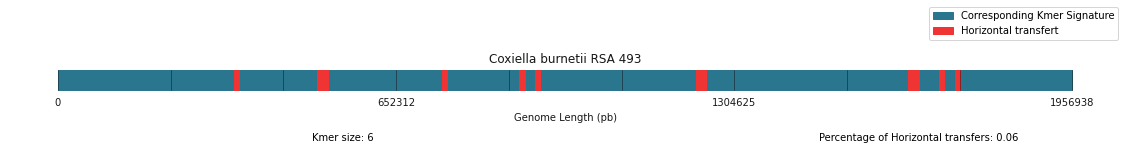

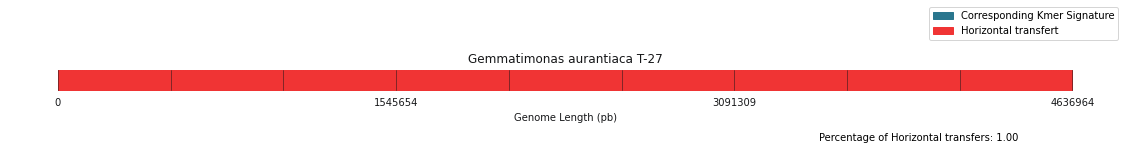

Archaeas


KeyError: 'Methanobrevibacter_ruminantium M1'

In [10]:
print("Bacterias")

listPvalue,listPositions=pp.SequenceHomogeneity(pathDictionnary["bacteria"]["Coxiella_burnetii_RSA_493"],6,10000)
pl.SequenceHomogeneity(listPvalue,listPositions,0.05,"Coxiella burnetii RSA 493",6)

listPvalue,listPositions=pp.SequenceHomogeneity(pathDictionnary["bacteria"]["Gemmatimonas_aurantiaca_T-27"],6,10000)
pl.SequenceHomogeneity(listPvalue,listPositions,0.05,"Gemmatimonas aurantiaca T-27")

print("Archaeas")

listPvalue,listPositions=pp.SequenceHomogeneity(pathDictionnary["archaea"]["Methanobrevibacter_ruminantium M1"],6,10000)
pl.SequenceHomogeneity(listPvalue,listPositions,0.05,"Methanobrevibacter ruminantium M1")

listPvalue,listPositions=pp.SequenceHomogeneity(pathDictionnary["archaea"]["Aeropyrum_pernix_K1"],6,10000)
pl.SequenceHomogeneity(listPvalue,listPositions,0.05,"Aeropyrum pernix K1")